In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train_data=pd.read_csv("training_data.csv")
test_data=pd.read_csv("test_data.csv")
print(train_data.shape)
print(train_data.columns)
print(test_data.shape)
test_Idx = test_data["review_id"]
test_Idx.to_pickle('test_Idx_pd.pkl')

(7997, 6)
Index(['review_id', 'business_id', 'user_id', 'text', 'date', 'stars'], dtype='object')
(2003, 5)


In [2]:
test_Idx.shape

(2003,)

In [3]:
train_data.head()

,review_id,business_id,user_id,text,date,stars
0,3223,2055,2533,"Sometimes things happen, and when they do this...",2010-12-30,5
1,9938,4165,6371,I know Kerrie through my networking and we ben...,2011-04-26,5
2,7123,869,4929,Love their pizza!!!\nVery fresh. Their cannoli...,2012-09-28,5
3,3601,1603,2789,Being from NJ I am always on the prowl for my ...,2009-06-07,4
4,3948,2347,1245,We have tried this spot a few times and each v...,2011-02-20,4


In [4]:
test_data.head()

,review_id,business_id,user_id,text,date
0,2713,668,2196,Ticoz is not a bad place. The menu is eclecti...,2009-01-04
1,4734,1014,3521,"Wow!\nBeing a Phoenix native, we have enjoyed ...",2010-10-05
2,5598,2939,3028,Jodi is fantastic! Extraordinary! After too ...,2011-04-29
3,9545,4077,6200,T&S Glass did a wonderful job replacing my car...,2007-10-02
4,1471,1126,1268,My experience was on a random Saturday afterno...,2010-08-16


In [5]:
gp_star = train_data.groupby(['stars'])
print(gp_star.size())
print(train_data['stars'].mean())

stars
1     599
2     741
3    1168
4    2820
5    2669
dtype: int64
3.777666624984369


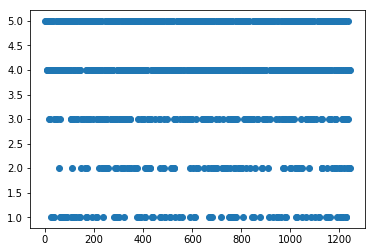

3.743


In [6]:
#Reset the order by review_id
train_data_sort_review = train_data.sort_values(by="review_id")
train_data_sort_review.head()
#To see the distributiona of star
review_id_list = train_data_sort_review["review_id"]
stars_list = train_data_sort_review["stars"]
plt.scatter(review_id_list[0:1000], stars_list[0:1000])
plt.show()
#To check if it is random
print(stars_list[0:1000].mean())

In [7]:
#Saperate the date
train_data_sort_review['date'] = pd.to_datetime(train_data_sort_review['date'])
train_data_sort_review['view_year'] = train_data_sort_review['date'].dt.year
train_data_sort_review['view_month'] = train_data_sort_review['date'].dt.month
train_data_sort_review['view_day'] = train_data_sort_review['date'].dt.day
test_data['date'] = pd.to_datetime(test_data['date'])
test_data['view_year'] = test_data['date'].dt.year
test_data['view_month'] = test_data['date'].dt.month
test_data['view_day'] = test_data['date'].dt.day

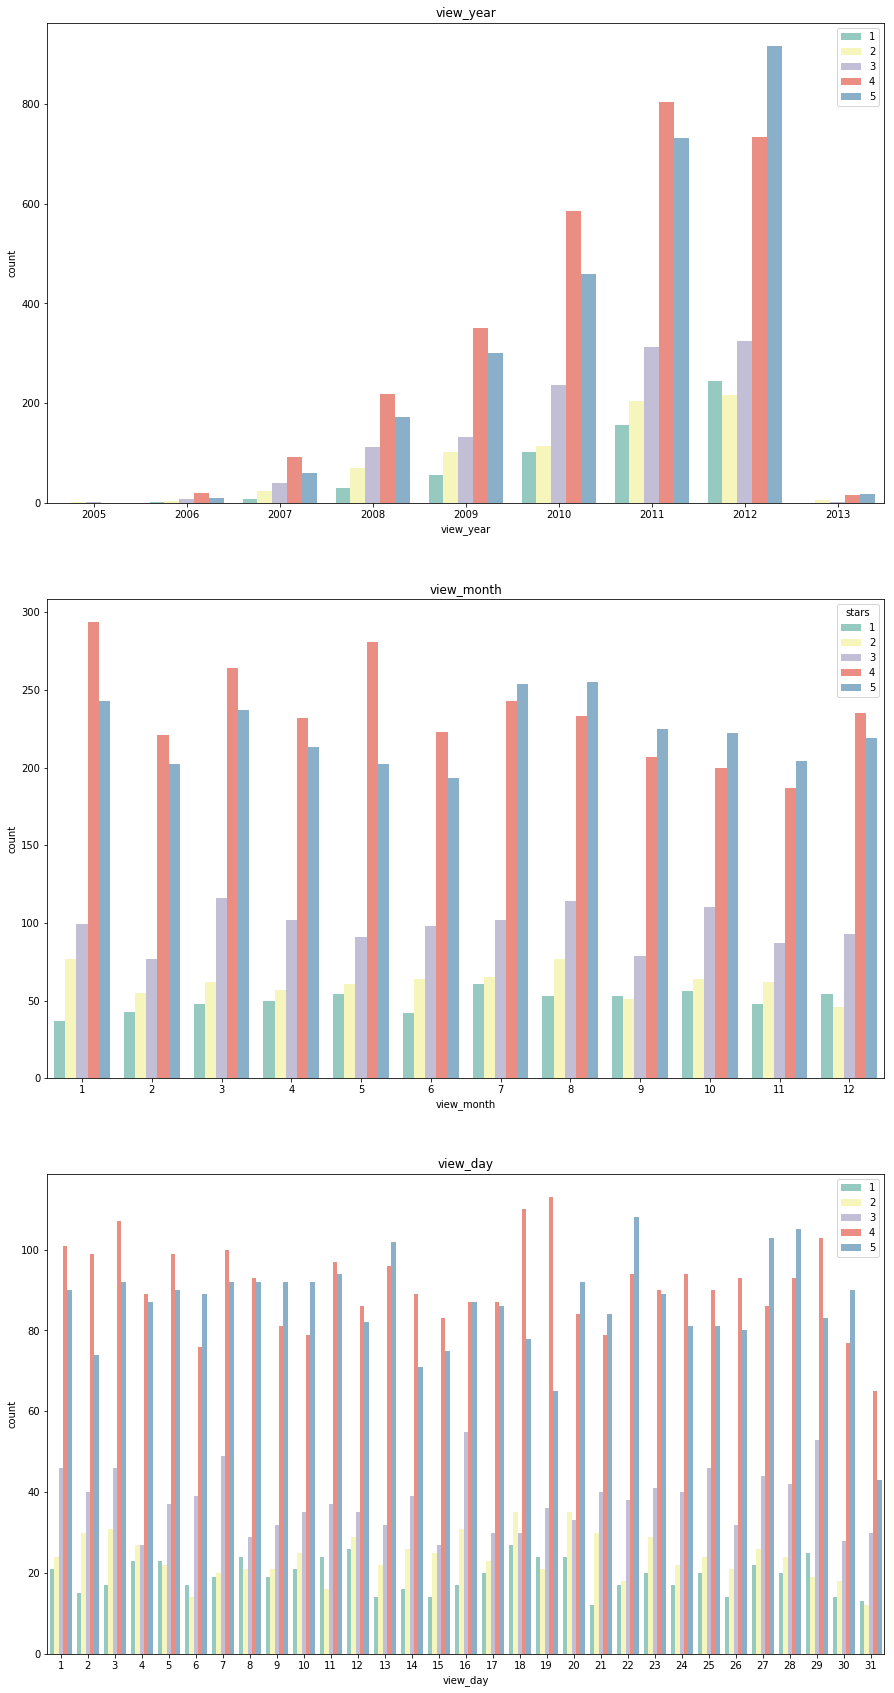

In [8]:
f, axarr = plt.subplots(3, figsize=(15, 30))

sns.countplot(x="view_year", hue="stars", data=train_data_sort_review, ax=axarr[0], palette="Set3")
sns.countplot(x="view_month", hue="stars", data=train_data_sort_review, ax=axarr[1], palette="Set3")
sns.countplot(x="view_day", hue="stars", data=train_data_sort_review, ax=axarr[2], palette="Set3")

axarr[0].set_title('view_year')
axarr[0].legend(loc="best")
axarr[1].set_title('view_month')
axarr[0].legend(loc="best")
axarr[2].set_title('view_day')
axarr[2].legend(loc="best")

plt.show()